In [ ]:
# Amber Billings

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Step 1 - Climate Analysis and Exploration

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
past_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

In [13]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
import datetime as dt

In [15]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
past_year

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(past_year, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.head()

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [18]:
# Sort the dataframe by date
df = df.sort_values('date')
df.head()

,precipitation
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


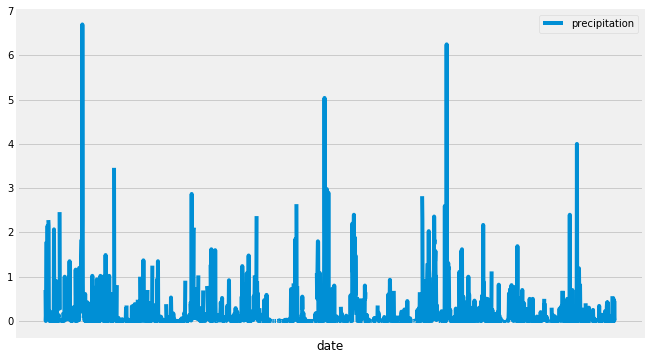

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10, 6))
plt.xticks([])
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [21]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [23]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)]
most_active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

top_station = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()

top_station

[(54.0, 85.0, 71.66378066378067)]

In [26]:
past_year_tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
past_year_tobs

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

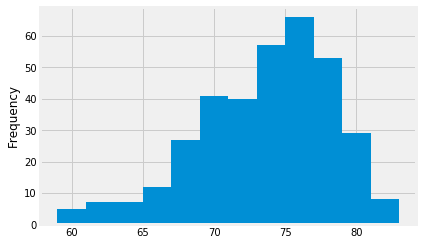

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = [val[2] for val in past_year_tobs]

plt.hist(tobs, bins=12)
plt.ylabel('Frequency')
plt.show()

## Step 2 - Climate App

In [28]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/><br/>"
        f"/api/v1.0/precipitation<br/>"
        f"Returns a dictionary of dates and precipitation measures from the dataset.<br/><br/>"
        f"/api/v1.0/stations<br/>"
        f"Returns a list of stations from the dataset.<br/><br/>"
        f"/api/v1.0/tobs <br />"
        f"Returns a list of temperature observations from the previous year.<br/><br/>"
        f"/api/v1.0/&lt;start&gt; <br />"
        f"Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start.<br/><br/>"
        f"/api/v1.0/&lt;start&gt;/&lt;end&gt; <br />"
        f"Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start-end range.<br/><br/>"
        f"Date format: YYYY-MM-DD"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date.desc()).all()

    precipitation = dict(results)

    return jsonify(precipitation)

@app.route("/api/v1.0/stations")
def stations():
    results = session.query(Station.station).all()
    
    stations = list(results)
    
    return jsonify(results)

@app.route("/api/v1.0/tobs")
def tobs():
    results = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').all()
    
    tobs = list(results)
    
    return jsonify(tobs)

@app.route("/api/v1.0/<start_date>")
def start_temps(start_date):
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= startDate).all()
    return jsonify(results)

@app.route("/api/v1.0/<start_date>/<end_date>")
def start_end_temps(start_date, end_date):
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).all()
    return jsonify(results)

NameError: name 'Flask' is not defined

## Optional: Other Recommended Analyses

In [ ]:
#The following are optional challenge queries. 
#These are highly recommended to attempt, but not required for the homework.

## Temperature Analysis

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-10-04', '2016-10-07'))

In [ ]:
trip_temp = calc_temps('2016-10-04', '2016-10-07')
min_temp = trip_temp[0][0]
avg_temp = trip_temp[0][1]
max_temp = trip_temp[0][2]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(3,9))
plt.bar(1, avg_temp, color='#f39470', alpha=0.6)
plt.vlines(1, 73, 81)
plt.xlim(0.4, 1.6)
plt.ylim(-5,105)
plt.xticks([], [])
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your 
# trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, 
# name, latitude, longitude, and elevation

sel = [Station.station, Station.name, Station.latitude, Station.longitude, func.sum(Measurement.prcp)]
total_rainfall = session.query(*sel).filter(Station.station == Measurement.station).\
    filter(Measurement.date >= '2016-10-04').\
    filter(Measurement.date <= '2016-10-07').\
    group_by(Station.station).all()
total_rainfall

## Daily Rainfall Average

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
trip_dates = ['10-04', '10-05', '10-06', '10-07']

tmin = []
tavg = []
tmax = []

for trip in trip_dates:
    date_info = daily_normals(trip)
    tmin.append(date_info[0][0])
    tavg.append(date_info[0][1])
    tmax.append(date_info[0][2])

In [ ]:
rain_df = pd.DataFrame()

In [ ]:
rain_df['date'] = trip_dates
rain_df['tmin'] = tmin
rain_df['tavg'] = tavg
rain_df['tmax'] = tmax
rain_df = rain_df.set_index('date')
rain_df

In [ ]:
rain_df.plot.area(stacked=False, alpha=0.2)
plt.xticks([0,1,2,3], rain_df.index, rotation=45)
plt.show()